In [123]:
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [124]:
from codice_py.etl import df_players, df_appearances, df_club_games, df_clubs, df_competitions, df_game_events, df_game_lineups,\
                          df_games, df_player_valuations
import matplotlib.pyplot as plt
import numpy as np

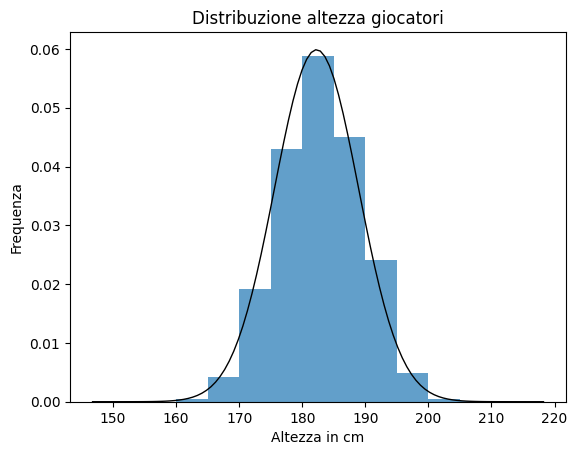

In [125]:
from scipy.stats import norm
plt.figure()
plt.hist(df_players["height_in_cm"], bins=np.arange(150, 220, 5), alpha=0.7, density = True)

#Parametri della distribuzione normale
mu, std = norm.fit(df_players['height_in_cm'])

# Curva di approssimazione
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)


plt.xlabel("Altezza in cm")
plt.ylabel("Frequenza")
plt.title("Distribuzione altezza giocatori")
plt.savefig("../images/distribuzione_altezza_giocatori_histo.png")

In [126]:
%pip install geopandas matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [127]:
import pandas as pd

184.53801450843653
6.105802005722981
181.17161351203904
6.3759386906289075


C:\Users\mikdr\AppData\Local\Temp\ipykernel_13860\271043295.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color ="blue")
C:\Users\mikdr\AppData\Local\Temp\ipykernel_13860\271043295.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color = "orange")


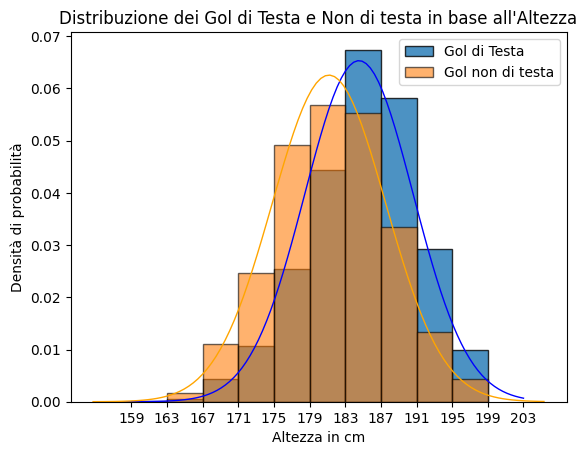

In [128]:
from scipy.stats import norm
df_head_goal = pd.merge(df_players, df_game_events[df_game_events["description"].notna() & df_game_events['description'].str.contains('Header')], on ='player_id', how='inner')
df_head_goal = df_head_goal.loc[df_head_goal['description'].str.split().str[1].str.strip().str.contains("Header")]

df_goal_no_testa = pd.merge(df_players, df_game_events[(df_game_events["type"].notna() & df_game_events['type'].str.contains('Goals') & ~df_game_events['description'].astype(str).str.contains('Header'))], on ='player_id', how='inner')

goal_totali = df_appearances.groupby("player_id")["goals"].sum().reset_index(name = "gol_totali")
df_players = pd.merge(df_players, goal_totali, left_on="player_id", right_on="player_id", how="left")

# Calcola l'intervallo tra le colonne in base all'intervallo di altezza
num_bins = 12
height_min = 159
height_max = 203
bin_width = 4


# Crea l'array di bin con gli intervalli desiderati
bins = np.arange(height_min, height_max, bin_width)

plt.figure() 
plt.hist(df_head_goal['height_in_cm'], bins=bins, edgecolor='black', alpha=0.8, label='Gol di Testa', width = bin_width, density = True)
plt.hist(df_goal_no_testa['height_in_cm'], bins=bins, edgecolor='black', alpha=0.6, label='Gol non di testa', width = bin_width, density = True)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Altezza in cm')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione dei Gol di Testa e Non di testa in base all\'Altezza')
plt.xticks([159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203])

mu1, std1 = norm.fit(df_head_goal['height_in_cm'])
# Curva di approssimazione
print(mu1)
print(std1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'k', linewidth=1, color ="blue")

mu2, std2 = norm.fit(df_goal_no_testa['height_in_cm'])
# Curva di approssimazione
print(mu2)
print(std2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu2, std2)
plt.plot(x, p, 'k', linewidth=1, color = "orange")

plt.legend()
plt.savefig("../images/distribuzione_golTesta_golNoTesta.png")
plt.show()





In [129]:
import geopandas as gpd

# Leggi il GeoDataFrame del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth', how='left')
print(df_players_geo.head())

print(df_players_geo.head())



      pop_est continent    name_x iso_a3  gdp_md_est  \
0    889953.0   Oceania      Fiji    FJI        5496   
1  58005463.0    Africa  Tanzania    TZA       63177   
2  58005463.0    Africa  Tanzania    TZA       63177   
3  58005463.0    Africa  Tanzania    TZA       63177   
4  58005463.0    Africa  Tanzania    TZA       63177   

                                            geometry  player_id  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...        NaN   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   182201.0   
2  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   568915.0   
3  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   666563.0   
4  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   833315.0   

                 name_y  last_season  current_club_id  ... height_in_cm  \
0                   NaN          NaN              NaN  ...          NaN   
1          Ally Samatta       2023.0           1091.0  ...        183.0   
2  Yohana Oscar Mkomola       2020.

C:\Users\mikdr\AppData\Local\Temp\ipykernel_13860\1247904751.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


    country_of_birth  num_players
0        Afghanistan            2
1            Albania           61
2            Algeria           44
3             Angola           51
4          Argentina          587
..               ...          ...
132       Uzbekistan           19
133        Venezuela           72
134          Vietnam            2
135           Zambia           18
136         Zimbabwe           17

[137 rows x 2 columns]


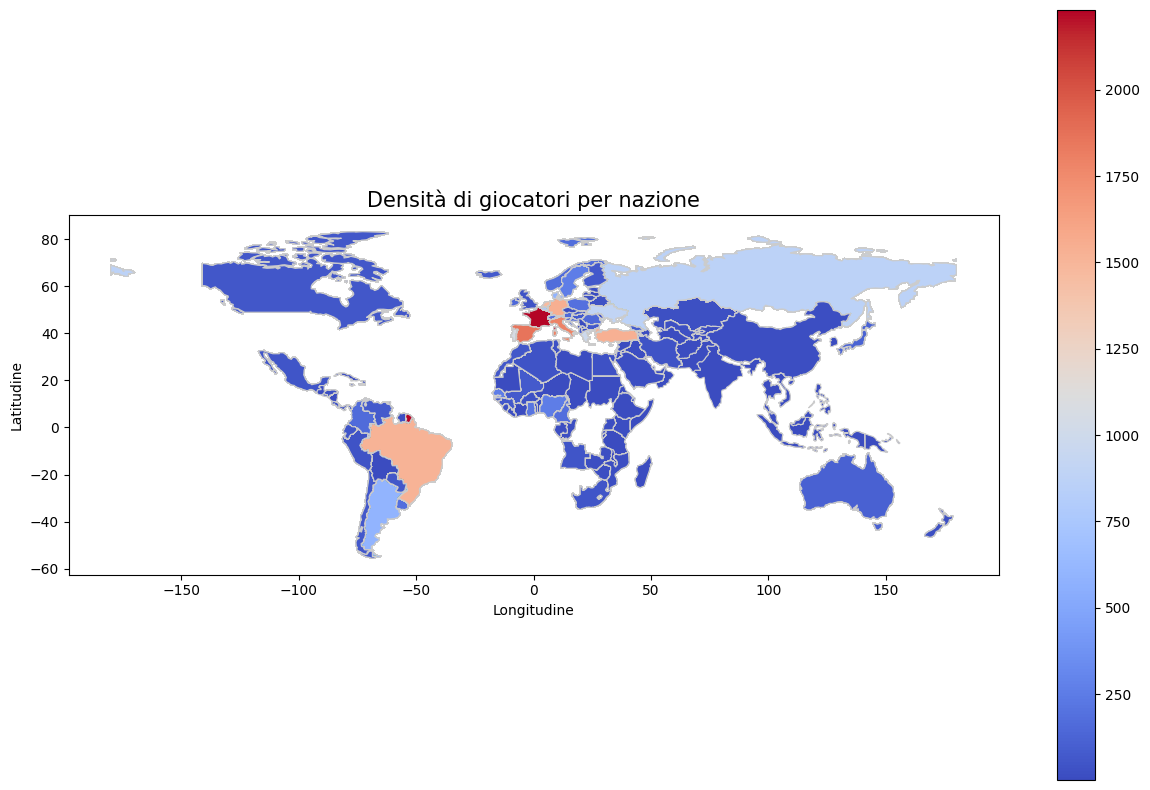

In [130]:
#Esegui l'aggregazione separatamente
agg_data = df_players_geo['player_id'].groupby(df_players_geo['country_of_birth']).count().reset_index()
agg_data.columns = ['country_of_birth', 'num_players']
print(agg_data)

# Unisci l'aggregazione con il tuo DataFrame
df_players_geo = pd.merge(df_players_geo, agg_data, on='country_of_birth', how='left')

# Disegna la mappa di calore
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Usa il metodo plot di GeoDataFrame per visualizzare la mappa di calore
df_players_geo.plot(column='num_players', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Aggiungi titolo e etichette
ax.set_title('Densità di giocatori per nazione', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra la legenda
leg = ax.get_legend()
if leg is not None:
    leg.set_bbox_to_anchor((1, 0.5))

# Mostra il grafico
plt.savefig("../images/giocatori_per_nazione_mappacalore.png")
plt.show()



In [131]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [132]:
#elimina = ["gol_totali", "presenze", "assist_totali", "ammonizioni_totali", "espulsioni_totali"]
#df_players.drop(columns=elimina, inplace=True)
#print(df_players)

In [133]:

#print("Sium 1")
#print(df_players)
#gol_totali_per_giocatore = df_goal_totali.groupby("name").size().reset_index(name="gol_totali")
#print("Sium 2")
#print(gol_totali_per_giocatore)
#df_players = pd.merge(df_players, gol_totali_per_giocatore, on="name", how="left")

presenze_per_giocatore = df_appearances.groupby("player_id").size().reset_index(name="presenze")
df_players = pd.merge(df_players, presenze_per_giocatore, left_on="player_id", right_on="player_id", how="left")

assist_totali = df_appearances.groupby("player_id")["assists"].sum().reset_index(name = "assist_totali")
df_players = pd.merge(df_players, assist_totali, left_on="player_id", right_on="player_id", how="left")

ammonizioni_totali = df_appearances.groupby("player_id")["yellow_cards"].sum().reset_index(name = "ammonizioni_totali")
df_players = pd.merge(df_players, ammonizioni_totali, left_on="player_id", right_on="player_id", how="left")

espulsioni_totali = df_appearances.groupby("player_id")["red_cards"].sum().reset_index(name = "espulsioni_totali")
df_players = pd.merge(df_players, espulsioni_totali, left_on="player_id", right_on="player_id", how="left")

#print("Sium 3")
print(df_players)
#print(df_players.columns())



       player_id                        name  last_season  current_club_id  \
0             10              Miroslav Klose         2015              398   
1             26          Roman Weidenfeller         2017               16   
2             65            Dimitar Berbatov         2015             1091   
3             77                       Lúcio         2012              506   
4             80                  Tom Starke         2017               27   
...          ...                         ...          ...              ...   
30329    1163778         Kahveh Zahiroleslam         2023              475   
30330    1166093  Georgios Konstantakopoulos         2023            30120   
30331    1173042                  Djibi Seck         2023              601   
30332    1176345            Mahamadou Nagida         2023              273   
30333    1186012              Bakary Haidara         2023              968   

                      player_code    country_of_birth         c

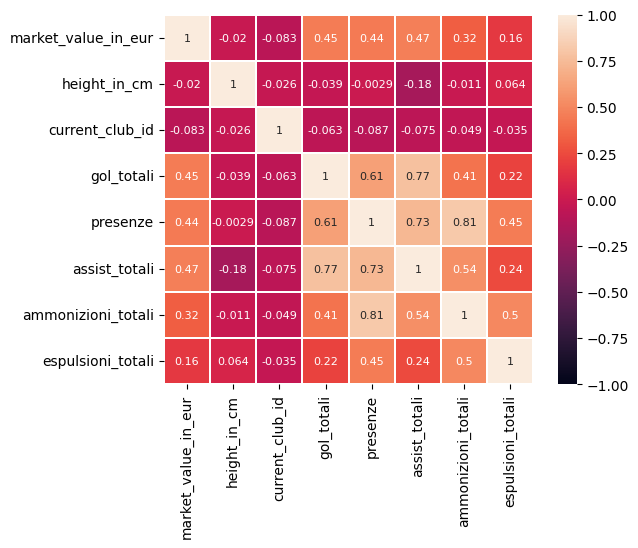

In [134]:
import seaborn as sns

correlazione = pd.merge(df_player_valuations[["market_value_in_eur", "player_id"]], df_players[["player_id", "height_in_cm", "current_club_id", "gol_totali", "presenze", "assist_totali", "ammonizioni_totali", "espulsioni_totali"]], how="inner", on="player_id")
numerical_columns = correlazione.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'player_id']

corr = correlazione[numerical_columns].corr()

annot_kws = {"size": 8}
sns.heatmap(corr,vmax=1, vmin=-1,square=True, annot=True, linewidths=.2, cbar=True, annot_kws=annot_kws)
plt.savefig("../images/correlazione_player.png")
plt.show()

